In [1]:
# First make sure to install all required packages.
# You can do it by running the following command:

In [2]:
# ]add Arrow CSV DataFrames Plots Clustering Distances FreqTables

In [3]:
# If you launched Jupyter in directory with attached Project.toml and Manifest.toml
# use below command to install required packages with fixed versions. 
# Check Project introduction for more information.

In [4]:
#] instantiate

In [5]:
# Import required libraries
using Arrow
using CSV
using DataFrames
using Plots
using Clustering
using Distances
using Random
using Statistics
using FreqTables

In [6]:
# Read clean dataset from Arrow file into DataFrame
sales_norm = DataFrame(Arrow.Table("sales_norm.arrow"))

,P1,P2,P3,P4,P5,P6,P7
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.369588,1.27724,-0.579404,1.04645,-0.142511,-0.498219,-0.0405672
2,0.640272,0.854207,0.790096,-0.075517,-1.06883,-0.498219,1.64703
3,0.0989037,-0.414901,-0.237029,1.32694,1.40135,-0.903022,-0.462466
4,-0.442464,-0.837937,0.105346,-0.916993,0.783809,1.12099,1.22513
5,0.910956,1.27724,0.447721,0.204975,-0.760057,0.71619,1.64703
6,0.640272,-1.26097,-0.237029,-0.636501,-0.451284,-0.498219,1.22513
7,1.18164,0.854207,-0.579404,0.204975,0.166262,1.5258,-0.884365
8,3.07643,-0.414901,1.47485,1.32694,1.71013,0.71619,-0.462466
9,-0.983832,-0.414901,1.13247,1.32694,0.166262,0.71619,2.49083


In [7]:
# Convert DataFrame to Matrix and make sure that one product is one column in the resulting matrix
cluster_data = Matrix(sales_norm)

52×811 Matrix{Float64}:
  0.369588    1.27724     -0.579404  …   0.571772  -0.594121  -0.438798
  0.640272    0.854207     0.790096     -0.571772  -0.594121   0.987295
  0.0989037  -0.414901    -0.237029     -0.571772  -0.594121  -0.438798
 -0.442464   -0.837937     0.105346     -0.571772   1.22319   -0.438798
  0.910956    1.27724      0.447721      0.571772  -0.594121  -0.438798
  0.640272   -1.26097     -0.237029  …   0.571772  -0.594121  -0.438798
  1.18164     0.854207    -0.579404      1.71532   -0.594121  -0.438798
  3.07643    -0.414901     1.47485       0.571772  -0.594121  -0.438798
 -0.983832   -0.414901     1.13247       0.571772   1.22319   -0.438798
  1.18164    -0.414901    -0.921779     -0.571772  -0.594121  -0.438798
  0.369588   -0.837937     1.81722   …  -0.571772  -0.594121  -0.438798
  1.18164    -0.837937     0.105346      0.571772  -0.594121  -0.438798
  1.72301     0.854207    -1.60653      -0.571772  -0.594121  -0.438798
  ⋮                                  ⋱  

In [8]:
# Check the extreme values of mean of each column - should be really close to 0
extrema(mean(cluster_data, dims=1))

(-4.526293869625638e-16, 5.252208924188241e-16)

In [9]:
# Check the extreme values of standard deviation of each column - should be really close to 1
extrema(std(cluster_data, dims=1))

(0.9999999999999998, 1.0000000000000002)

In [10]:
# Set seed for reproducibility
# You may not use seed in your solution and receive slightly different 
# results due to probabilistic character of K-means algorithm
Random.seed!(42)

MersenneTwister(42)

In [11]:
# Produce clustering for 2-20 clusters with kmpp (K-means++) seeding
res_kmpp = [kmeans(cluster_data, i, init=:kmpp) for i in 2:20];

In [12]:
# Produce clustering for 2-20 clusters with rand (random) seeding
res_rand = [kmeans(cluster_data, i, init=:rand) for i in 2:20];

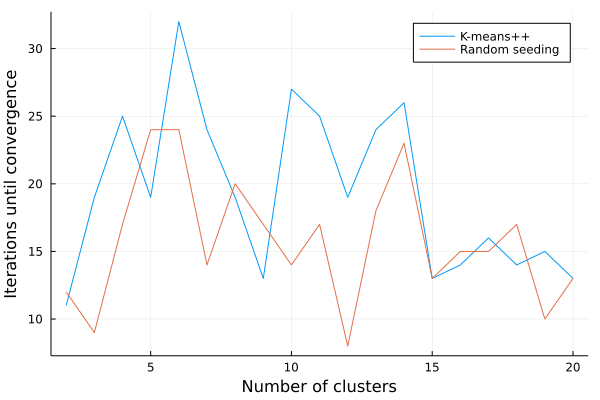

In [13]:
# Check how many iterations both seeding algorithm required before converging for all 'k' values
# We may expected K-means++ to converge faster due to 'intelligent' seeding, but this is not the case for our task
plot(2:20, hcat(getfield.(res_kmpp,:iterations), getfield.(res_rand,:iterations)),
    xlab="Number of clusters", ylab="Iterations until convergence", label=["K-means++" "Random seeding"])

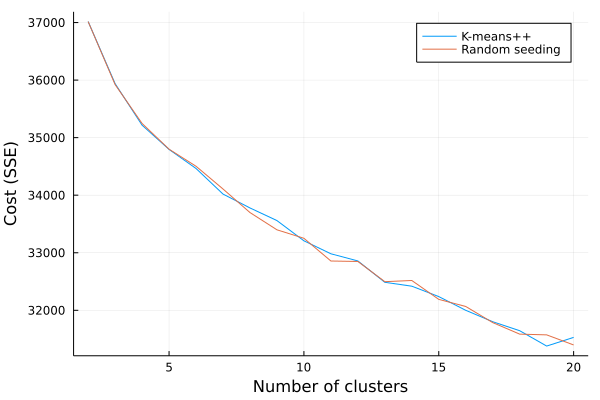

In [14]:
# Visualize total cost (Sum of Squared Errors) for both seeding algorithms and all values of 'k'
# We can choose proper number of cluster using 'elbow' method
# The curve is really smooth and it's hard to pick the proper number of clusters
# This is a common in common situation in practie
# We'll use 4 clusters as we want to interpret the results with reasonable number of groups
# and there seems to be a slight change of slope there
plot(2:20, hcat(getfield.(res_kmpp,:totalcost), getfield.(res_rand,:totalcost)), 
    xlab="Number of clusters", ylab="Cost (SSE)", label=["K-means++" "Random seeding"])

In [15]:
# Check how similar the clusterings for random seeding and k-means++ are
freqtable(res_kmpp[3].assignments, res_rand[3].assignments, )
# The results are quite consistent, but not identical
# therefore we decide to run the k-means algorithm for 4 clusters 1000 times to get the best assignment

4×4 Named Matrix{Int64}
Dim1 ╲ Dim2 │   1    2    3    4
────────────┼───────────────────
1           │   1  196    1   11
2           │   0    2  163    2
3           │   8    3   30  178
4           │ 211    3    0    2

In [16]:
# Produce clustering for 4 clusters with kmpp (K-means++) seeding
kmpp4 = [kmeans(cluster_data, 4, init=:kmpp) for _ in 1:1000];

In [17]:
# Check the coefficient of variation for produced clusterings
tc_kmpp4 = getfield.(kmpp4, :totalcost);
string("Coefficient of variation: ", std(tc_kmpp4)/mean(tc_kmpp4)*100, "%")

"Coefficient of variation: 0.23459366741230897%"

In [18]:
# Produce clustering for 4 clusters with random seeding
krand4 = [kmeans(cluster_data, 4, init=:rand) for _ in 1:1000];

In [19]:
# Check the coefficient of variation for produced clusterings
tc_krand4 = getfield.(krand4, :totalcost);
string("Coefficient of variation: ", std(tc_krand4)/mean(tc_krand4)*100, "%")

"Coefficient of variation: 0.23311830109471807%"

In [20]:
# Pick the best clustering based on conducted evaluations
opt_clustering = if minimum(tc_kmpp4) <= minimum(tc_krand4)
    kmpp4[argmin(tc_kmpp4)]
else
    krand4[argmin(tc_krand4)]
end;

In [21]:
# Check the members count in each cluster
# The clusters look quite balanced
freqtable(opt_clustering.assignments)

4-element Named Vector{Int64}
Dim1  │ 
──────┼────
1     │ 206
2     │ 163
3     │ 215
4     │ 227

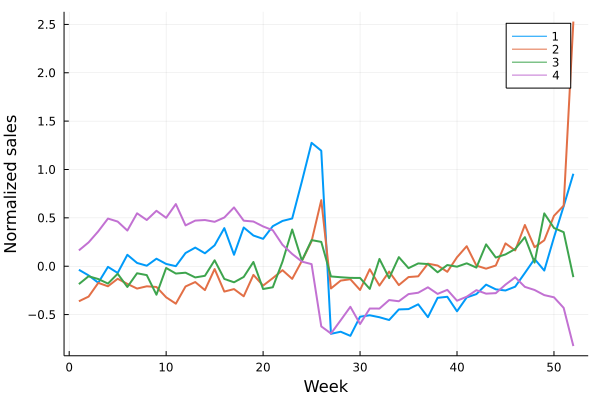

In [22]:
# Plot cluster averages
# Each cluster has some distinct characteristic we should summarize for the recipients of the report
plot(hcat([mean(cluster_data[:, opt_clustering.assignments .== i], dims=2) for i in 1:4]...), 
    xlab="Week", ylab="Normalized sales", labels=[1 2 3 4], linewidth=2)

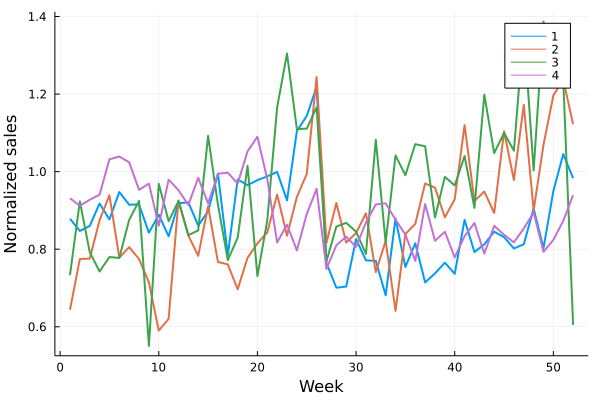

In [23]:
# Plot cluster standard deviations
# No huge difference here, but we can spot that some clusters have higher variability in general
plot(hcat([std(cluster_data[:, opt_clustering.assignments .== i], dims=2) for i in 1:4]...), 
    xlab="Week", ylab="Normalized sales", labels=[1 2 3 4], linewidth=2)

In [24]:
# Save k-means assignments to the text file
open("kmeans_assignments.txt", "w") do io
  foreach(e -> println(io, e), opt_clustering.assignments)
end

**Analysis of clustering results**

Based on clustering results evaluation we produced 4 clusters for all products in the dataset.

Each cluster has distinct characteristic summarized below:
* Cluster 1 sales were increasing steadily until mid-year when they dropped to extremely low values. After that we again see a steady increase in sales. We should investigate what exactly happend around the spike period - maybe there was a new hot release (initial increase in sales), but it was faulty and our customers resigned from the product?
* Cluster 2 is similar to Cluster 3 as it has a positive trend for sales and absolute sales values are on similar level. However there is a rapid raise mid-year that is followed by also sudden drop in sales to the previous level. Also there is huge sales boost at the end of tracked period. That group of products are really popular recently for some reason.
* Cluster 3 is the most stable, there is no spike in the sales and it expose slight increasing trend
* Cluster 4 maintained high, steady sales for 20 weeks, which was followed by sharp drop in revenue. Sales were recovering after the drop, but we can spot another decrease during last weeks. Maybe our other products are consuming sales for that cluster?

Variance analysis revealed that there is no signifanct difference in clusters' sales stability. Cluster 2 and 3 are however switiching from really small variance at the beginning of the year to high variance mid-year and at the end of the period. 